In [1]:
import chromadb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
chroma_client = chromadb.PersistentClient(
    path="./persistent_db"
)


In [3]:
collection = chroma_client.get_or_create_collection(
    name="cv_doc",
    metadata={"hnsw:space": "cosine"}
)
print(collection)

Collection(name=cv_doc)


In [4]:
data_embeddings = collection.get(include = ["embeddings"])
list_of_embeddings = data_embeddings["embeddings"]
ids = data_embeddings["ids"]
print(list_of_embeddings)

Add of existing embedding ID: id1
Add of existing embedding ID: id2
Add of existing embedding ID: id3
Add of existing embedding ID: id4
Add of existing embedding ID: id5
Add of existing embedding ID: id6
Add of existing embedding ID: id1
Add of existing embedding ID: id2
Add of existing embedding ID: id3
Add of existing embedding ID: id4
Add of existing embedding ID: id5
Add of existing embedding ID: id6
Add of existing embedding ID: id1
Add of existing embedding ID: id2
Add of existing embedding ID: id3
Add of existing embedding ID: id4
Add of existing embedding ID: id5
Add of existing embedding ID: id6
Add of existing embedding ID: id1
Add of existing embedding ID: id2
Add of existing embedding ID: id3
Add of existing embedding ID: id4
Add of existing embedding ID: id5
Add of existing embedding ID: id6


[[-0.03378393 -0.01298109 -0.07332359 ... -0.00288977  0.0504246
  -0.02742945]
 [ 0.00029563 -0.00404174  0.0348425  ...  0.05359803  0.01671012
  -0.06912432]
 [-0.06552347 -0.05243041  0.00340323 ...  0.09270393  0.00311675
  -0.01493849]
 [-0.06275786 -0.01182599  0.02188251 ...  0.16364907  0.0763072
  -0.07198066]
 [ 0.00385048 -0.01845131 -0.09301053 ... -0.00547395  0.01656958
  -0.00125266]
 [-0.01080946  0.04051023 -0.02771753 ... -0.00269964 -0.00727564
  -0.02061289]]


(6, 384)


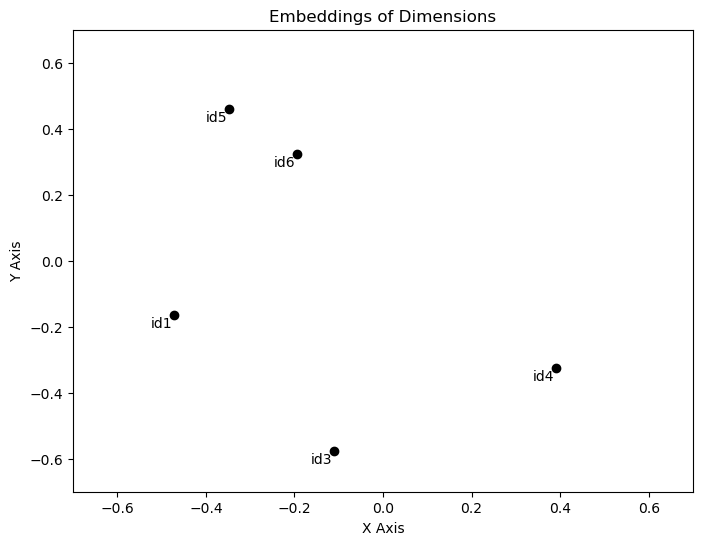

In [5]:
numpy_array = np.array(list_of_embeddings)
print(numpy_array.shape)

# creates a figure
fig, ax = plt.subplots(figsize=(8,6))

# Reduce dimensions

pca = PCA(n_components = 2)
embeddings_pca = pca.fit_transform(numpy_array)

for i, embedding in enumerate(embeddings_pca):
    ax.scatter(*embedding, c='k')
    ax.annotate(f'{ids[i]}', (embedding[0],embedding[1]), xytext=(-1,-1), textcoords='offset points', ha='right', va='top')

ax.set_xlim(-0.70, 0.70)
ax.set_ylim(-0.70, 0.70)

plt.title("Embeddings of Dimensions")
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

#Show the plot
plt.show()